In [19]:
import pydotplus 
import pandas as pd
from IPython.display import Image
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [20]:
dataset = pd.read_csv("german_credit.csv")

In [21]:
# Посмотрим на признаки и их значения
dataset.head()

,target,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


## Строим дерево с помощью sklearn

In [22]:
model = tree.DecisionTreeClassifier(max_depth=4)
model.fit(dataset[dataset.columns[1:]], dataset[dataset.columns[0]])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [23]:
dot_data = tree.export_graphviz(model, out_file="tree.out", 
                         feature_names=dataset.columns[1:],
                         filled=True, rounded=True)  

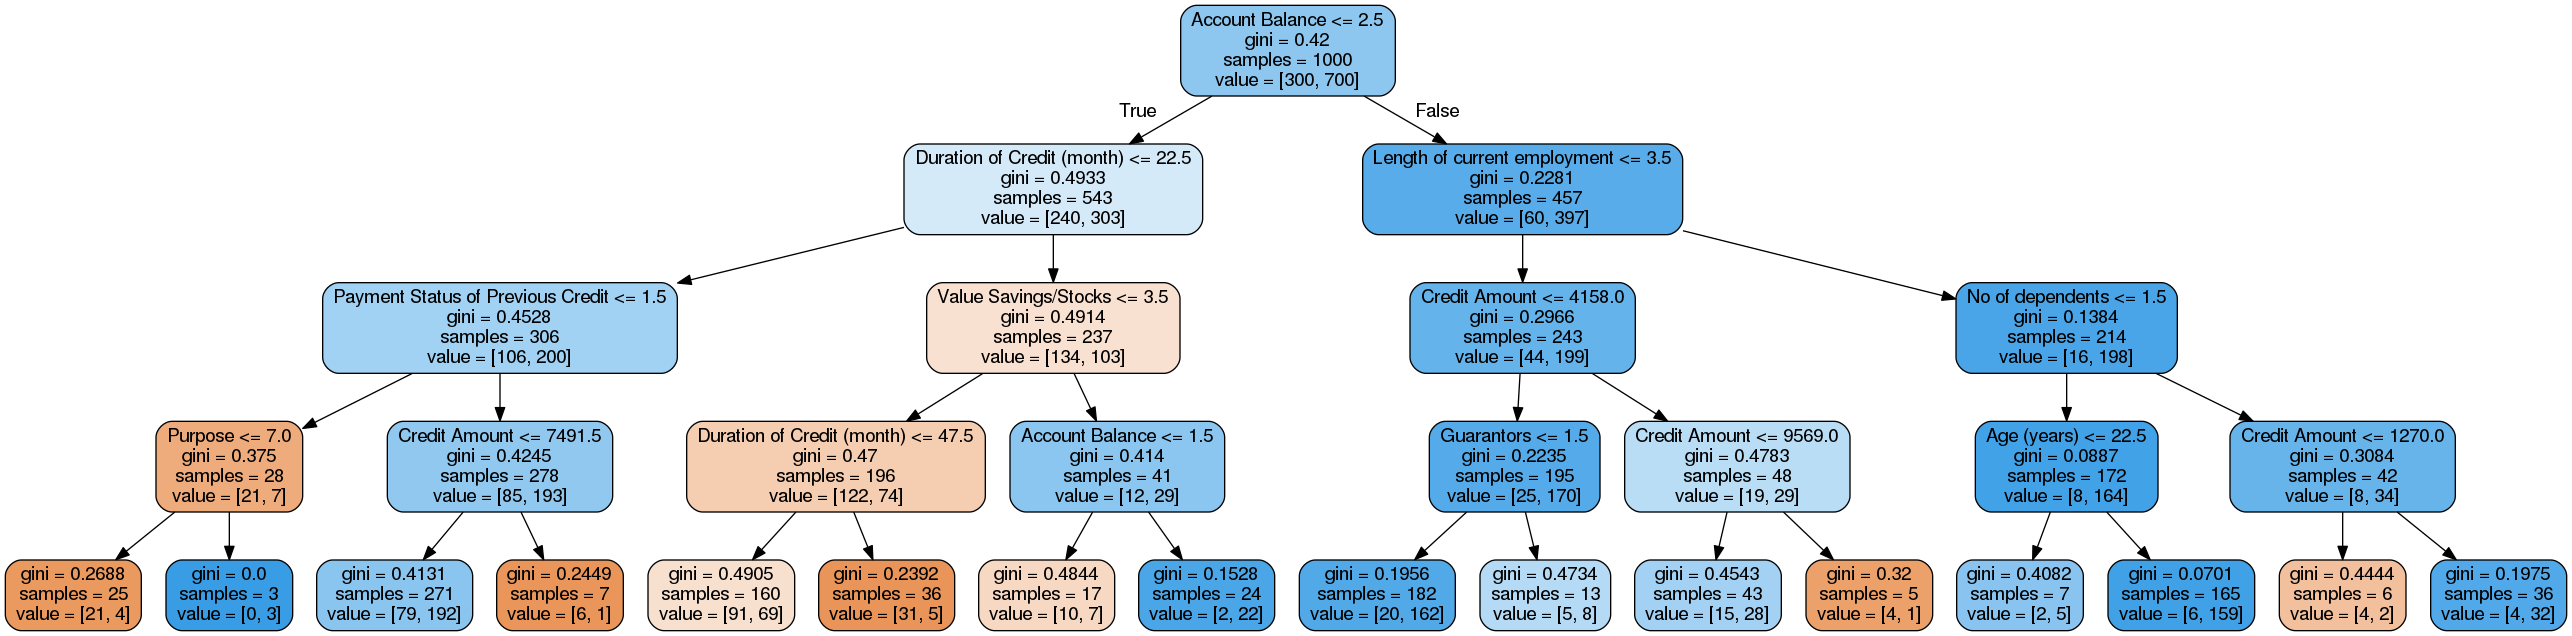

In [24]:
graph = pydotplus.graphviz.graph_from_dot_file("tree.out")   
Image(graph.create_png())

Я сделала максимальную высоту дерева = 4, иначе ничего не видно.     
### Проинтерпретируем первые разбиения     
Первый признак разбиения: первым делом проверяется размер счета сейчас. Потом в зависимости от его размера спрашивается срок данного кредита или же сведения о нынешней занятости. Вполне логично.

## Оценим качество

In [25]:
train_data, test_data, train_target, test_target = train_test_split(dataset[dataset.columns[1:]], 
                                                dataset[dataset.columns[0]], test_size = 0.2)

In [26]:
model.fit(train_data, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [27]:
test_predictions = model.predict(test_data)

In [28]:
print(classification_report(test_target, test_predictions))

             precision    recall  f1-score   support

          0       0.60      0.49      0.54        57
          1       0.81      0.87      0.84       143

avg / total       0.75      0.76      0.75       200



## Графики зависимости качества на кросс-валидации и на обучающей выборке от глубины дерева

In [29]:
#  построим деревья глубины от 1 до 20 
#  для каждого случая посчитаем accuracy и cross_val_score
accuracy = []
cross_val = []

for depth in range(1, 50):
    model = tree.DecisionTreeClassifier(max_depth=depth)
    train_data, test_data, train_target, test_target =
        train_test_split(dataset[dataset.columns[1:]], dataset[dataset.columns[0]],
                                                        test_size = 0.2)
    model.fit(train_data, train_target)
    test_predictions = model.predict(test_data)
    accuracy.append(model.score(dataset[dataset.columns[1:]], 
                                dataset[dataset.columns[0]]))
    cross_val.append(cross_val_score(model, 
 dataset[dataset.columns[1:]], dataset[dataset.columns[0]], n_jobs=-1, cv=10, scoring='accuracy').mean())

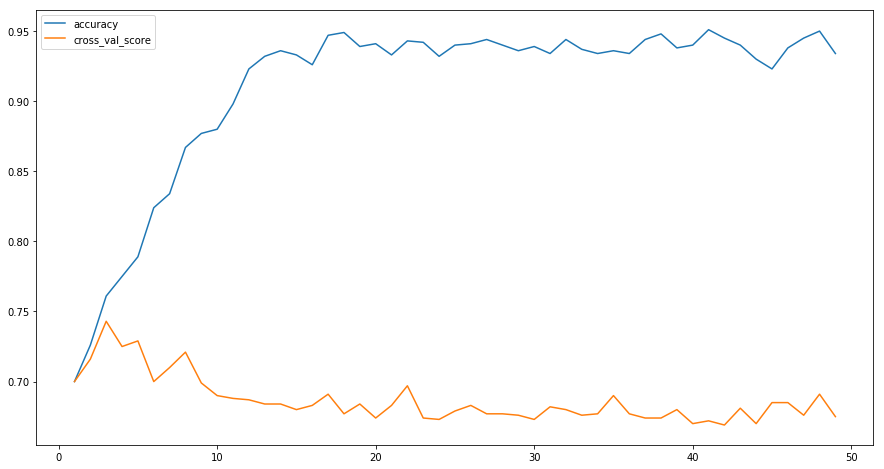

In [30]:
plt.figure(figsize=(15, 8))
x = range(1, 50)
plt.plot(x, accuracy, label='accuracy')
plt.plot(x, cross_val, label='cross_val_score')
plt.legend()
plt.show()

### Выводы:
Accuracy быстро растет, потому что быстро переобучается. Cross_val_score очень медленно уменьшается